In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

sns.set(style='white', context='notebook', palette='deep')

In [2]:
# Load the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Check the data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

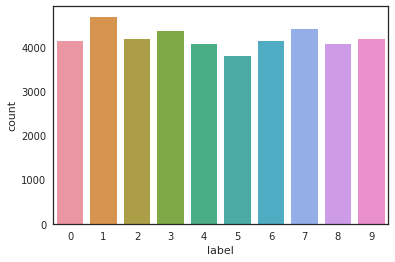

In [3]:
y_train = train['label']

# Drop the label column
x_train = train.drop(labels = ['label'], axis = 1)

del train

sns.countplot(y_train)
y_train.value_counts()

In [4]:
x_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
y_train.describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [6]:
# Normalize the data
x_train = x_train / 255.0
test = test / 255.0

In [7]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
# y_train = to_categorical(y_train, num_classes = 10)just_keras_things
enc = OneHotEncoder(n_values = 10)
y_train = enc.fit_transform(y_train.values.reshape(-1, 1)).toarray()

In [9]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
y_train_label = np.array([label.argmax() for label in y_train])
y_train_label

array([1, 0, 1, ..., 7, 6, 9])

In [11]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_classes = 10

In [12]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

In [13]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

In [14]:
logits = tf.matmul(x, weights) + biases

In [15]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

In [16]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [17]:
correct = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [18]:
session = tf.Session()

In [19]:
session.run(tf.global_variables_initializer())

In [20]:
BATCH_SIZE = 100

In [21]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
val_size = int(0.1 * 42000)
x_val = x_train[:val_size]
y_val = y_train[:val_size]

x_train = x_train[val_size:]
y_train = y_train[val_size:]

In [23]:
y_val_label = np.array([label.argmax() for label in y_val])
y_val_label

array([1, 0, 1, ..., 9, 2, 5])

In [24]:
epoch_completed = 0
index_in_epoch = 0
num_examples = x_train.shape[0]
print(num_examples)

def next_batch(batch_size):
    
    global x_train
    global y_train
    global index_in_epoch
    global epoch_completed
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > num_examples:
        # finished epoch
        epoch_completed += 1
        # shuffle data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        x_train = x_train.iloc[perm]
        y_train = y_train[perm]
        # start next epoch
        start = 0
        index_in_epoch = batch_size
        assert batch_size <= num_examples
    
    end = index_in_epoch
    return x_train[start:end], y_train[start:end]

37800


In [25]:
def optimize(iterations):
    for i in range(iterations):
        
        x_batch, y_true_batch = next_batch(BATCH_SIZE)
        feed_dict_train = {x:x_batch, y_true:y_true_batch}
        
        session.run(optimizer, feed_dict=feed_dict_train)

In [26]:
feed_dict_test = {x: x_val, y_true: y_val, y_true_cls: y_val_label}

def print_accuracy():
    
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    print('Accuracy on test = ', acc)

In [27]:
optimize(1)
print_accuracy()

Accuracy on test =  0.35619047


In [28]:
optimize(100)
print_accuracy()

Accuracy on test =  0.8559524


In [29]:
print(epoch_completed)

0


In [30]:
optimize(1000)
print_accuracy()

Accuracy on test =  0.905


In [31]:
print(epoch_completed)

2


In [32]:
optimize(2000)
print_accuracy()
print(epoch_completed)

Accuracy on test =  0.91690475
8
